# Importing Libraries

In [1]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Test set Image Processing

In [2]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)

Found 11603 files belonging to 38 classes.
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Tw

# Loading Model

In [3]:
cnn = tf.keras.models.load_model('trained_plant_disease_model.keras')

# Visualising and Performing Prediction on Single image

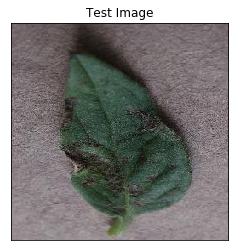

In [4]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

image_path = 'test/TomatoEarlyBlight6.JPG'
img = imread(image_path)
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

## Testing Model

In [5]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
print(input_arr.shape)
input_arr = np.array([input_arr])  # Convert single image to a batch.
print(input_arr.shape)
predictions = cnn.predict(input_arr)

(128, 128, 3)
(1, 128, 128, 3)


In [6]:
print(predictions)
print(predictions.shape)

[[9.85584920e-05 2.78624450e-03 3.34625423e-04 1.01760076e-02
  7.43635115e-04 1.56154769e-04 4.85015262e-05 1.22444850e-04
  1.04806513e-05 9.06259156e-05 5.25124669e-05 5.15630061e-04
  5.42407855e-04 5.15361389e-05 1.55531603e-03 1.15559116e-04
  5.51232777e-04 1.11194397e-03 5.26260992e-04 3.13265453e-04
  4.43739991e-05 3.43013438e-03 1.70405977e-03 3.41845618e-04
  4.07059724e-03 1.04788378e-04 3.22046340e-04 1.22547534e-03
  2.52837595e-03 2.53311515e-01 1.99056044e-03 7.92448584e-04
  4.72932355e-03 1.54680029e-01 5.26779473e-01 1.82742416e-03
  1.95316840e-02 2.68291100e-03]]
(1, 38)


In [7]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

34


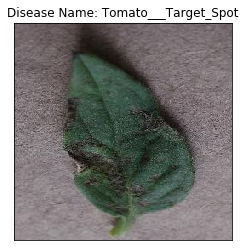

In [8]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()